In [49]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

### tissue info

In [50]:
sdrf = pd.read_table("/home1/wangd/project/PXD010154/PXD010154.sdrf.tsv")

In [51]:
sdrf["reference_file_name"] = sdrf['comment[data file]'].str.split(".", expand=True)[0]
tissue_map  = sdrf.set_index('reference_file_name')["characteristics[organism part]"].to_dict()

In [52]:
tissue_map

{'01524_A01_P015424_S00_N01_R1': 'adrenal gland',
 '01524_B01_P015424_S00_N02_R1': 'adrenal gland',
 '01524_C01_P015424_S00_N03_R1': 'adrenal gland',
 '01524_D01_P015424_S00_N04_R1': 'adrenal gland',
 '01524_E01_P015424_S00_N05_R1': 'adrenal gland',
 '01524_F01_P015424_S00_N06_R1': 'adrenal gland',
 '01524_G01_P015424_S00_N07_R1': 'adrenal gland',
 '01524_H01_P015424_S00_N08_R1': 'adrenal gland',
 '01524_A02_P015424_S00_N09_R1': 'adrenal gland',
 '01524_B02_P015424_S00_N10_R1': 'adrenal gland',
 '01524_C02_P015424_S00_N11_R1': 'adrenal gland',
 '01524_D02_P015424_S00_N12_R1': 'adrenal gland',
 '01524_E02_P015424_S00_N13_R1': 'adrenal gland',
 '01524_F02_P015424_S00_N14_R1': 'adrenal gland',
 '01524_G02_P015424_S00_N15_R1': 'adrenal gland',
 '01524_H02_P015424_S00_N16_R1': 'adrenal gland',
 '01524_A03_P015424_S00_N17_R1': 'adrenal gland',
 '01524_B03_P015424_S00_N18_R1': 'adrenal gland',
 '01524_C03_P015424_S00_N19_R1': 'adrenal gland',
 '01524_D03_P015424_S00_N20_R1': 'adrenal gland',


### from parquet

In [53]:
parq_file = "/home1/wangd/project/PXD010154/PXD010154-1de73bcb-ee3e-4d19-9d8d-da72f11d5fac.psm.parquet"
table = pq.read_table(parq_file)
df = table.to_pandas()

In [54]:
df["organism part"] = df["reference_file_name"].map(tissue_map)

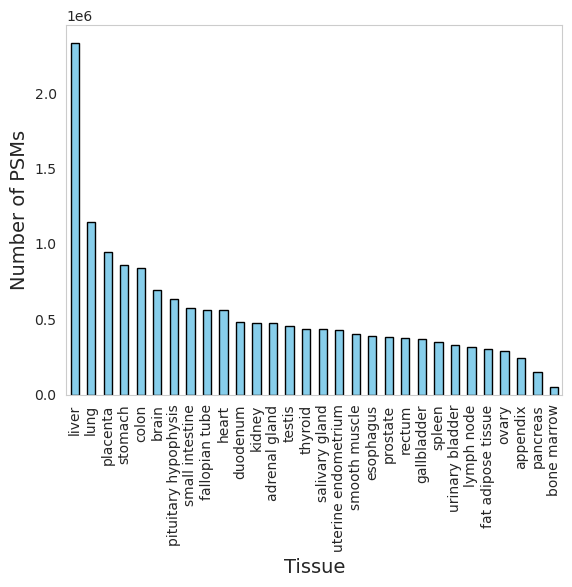

In [59]:
value_counts = df['organism part'].value_counts()
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Tissue', fontsize=14)
plt.ylabel('Number of PSMs', fontsize=14)
plt.grid(False)
# plt.ticklabel_format(style='plain', axis='y')
plt.savefig('tissue_distribution_from_parquet.svg', format='svg', transparent=True, bbox_inches='tight')
plt.show()

### final result

In [60]:
final_res = pd.read_table("/home1/wangd/project/PXD010154/GCA_blast/PXD010154-1de73bcb-ee3e-4d19-9d8d-da72f11d5fac.psm.parquet/gca_peptides_for_deeplc_95thperc_observations_ms2pip_by_filtered.tsv")

In [61]:
final_res["organism part"] = final_res["reference_file_name"].map(tissue_map)

In [62]:
final_res

,sequence_x,protein_accessions,charge,scan_number,peptidoform,exp_mass_to_charge,calc_mass_to_charge,seq,tr,modifications,...,count_B,count_Y,corrected_pearsonr_B,corrected_pearsonr_Y,corrected_dot_product,total_ions,number_peaks,signal_to_noise,diff_highest_lowest,organism part
0,AAAAAAAAAPAAAATAATTAATTAATAAQ,GCA_109298,2,28971,AAAAAAAAAPAAAATAATTAATTAATAAQ,1172.107178,1171.600967,AAAAAAAAAPAAAATAATTAATTAATAAQ,4215.9185,NaN,...,28,28,0.938671,0.916177,1.854847,56,201,8.335360,382.334717,lymph node
1,AAAAPAPPAGPR,GCA_161748,2,9337,AAAAPAPPAGPR,524.284728,523.790718,AAAAPAPPAGPR,1338.6000,NaN,...,11,11,-0.051957,1.276448,1.224491,22,91,4.659606,293.245368,salivary gland
2,AAAAPEASPSPGGDAAWSEAGPGPR,GCA_125965,2,19121,AAAAPEASPSPGGDAAWSEAGPGPR,1139.535889,1139.030177,AAAAPEASPSPGGDAAWSEAGPGPR,2500.9456,NaN,...,24,24,0.914510,1.865369,2.779879,48,134,9.519287,623.096960,lymph node
3,AAAFYKNILGAQVSEVVPLPEHGVSVVFVNLGNTK,GCA_133924,4,62173,AAAFYKNILGAQ[Deamidated]VSEVVPLPEHGVSVVFVNLGNTK,918.255432,917.997627,AAAFYKNILGAQVSEVVPLPEHGVSVVFVNLGNTK,5808.4260,12|Deamidated,...,34,34,0.731502,2.136918,2.868420,68,233,6.354093,332.768632,pituitary hypophysis
4,AAAGDLGGDHLAFSCDVAKEHDVQNTFEEMEK,GCA_60405,4,28430,AAAGDLGGDHLAFSC[Carbamidomethyl]DVAKEHDVQNTFEEMEK,873.644649,873.642418,AAAGDLGGDHLAFSCDVAKEHDVQNTFEEMEK,3506.6000,15|Carbamidomethyl,...,31,31,0.274421,2.112054,2.386475,62,294,7.324008,449.853470,liver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8548,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,GCA_170013,4,34975,YWC[Carbamidomethyl]NDGKN[Deamidated]PGAVN[Dea...,967.694946,967.427389,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,4089.2166,3|Carbamidomethyl|15|Carbamidomethyl|19|Carbam...,...,34,34,0.258653,2.173789,2.432442,68,267,11.936250,881.325484,kidney
8549,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,GCA_170013,4,35579,YWC[Carbamidomethyl]NDGKN[Deamidated]PGAVNAC[C...,967.692444,967.427389,YWCNDGKNPGAVNACHLSCSALLQDNIADAVACAK,3992.6436,3|Carbamidomethyl|15|Carbamidomethyl|19|Carbam...,...,34,34,0.716063,2.064077,2.780139,68,304,13.346966,592.653132,stomach
8550,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,"GCA_284206,GCA_284208",5,36949,YWM[Oxidation]HFC[Carbamidomethyl]GGSLIHPQ[Dea...,660.522216,660.314440,YWMHFCGGSLIHPQWVLTAAHCLGPDVK,4513.1000,3|Oxidation|6|Carbamidomethyl|22|Carbamidometh...,...,27,27,0.716000,1.624169,2.340169,54,94,4.179343,195.553136,smooth muscle
8551,YYNAKTEDKVR,GCA_154212,3,5165,YYN[Deamidated]AKTEDKVR,463.234832,463.233260,YYNAKTEDKVR,1137.2000,3|Deamidated,...,10,10,0.586982,1.499682,2.086664,20,151,8.627556,441.274258,placenta


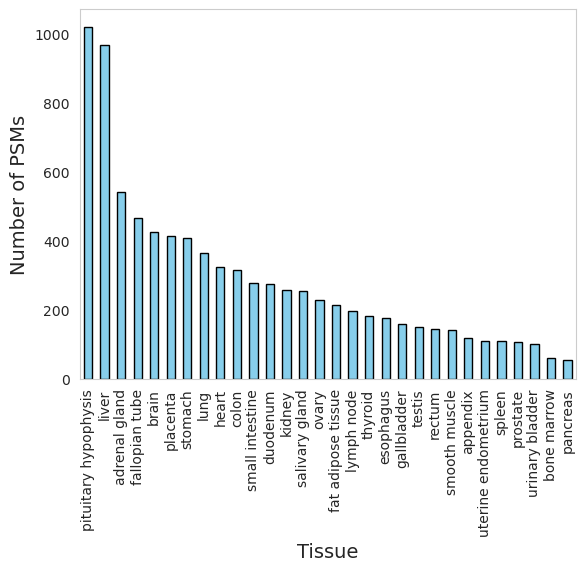

In [64]:
value_counts = final_res['organism part'].value_counts()
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Tissue', fontsize=14)
plt.ylabel('Number of PSMs', fontsize=14)
plt.grid(False)
plt.savefig('tissue_distribution_from_final_res.svg', format='svg', transparent=True, bbox_inches='tight')
plt.show()